In [1]:
# jupyter 상에서 SVG 이미지를 표시하기 위한 패키지(jupyter 기본 내장 패키지)
from IPython.display import SVG

# TAG로부터 원하는 내용을 추출하는 클래스 -> SVG 이미지의 핸들링을 위함
from bs4 import BeautifulSoup

# 원격지의 svg 파일의 내용을 읽어오기 위함.
import requests

from pandas import pivot_table, read_csv, read_excel,DataFrame
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sb
import folium
import folium
from os import path, mkdir

In [2]:
plt.rcParams["font.family"] = 'Malgun Gothic'
#plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["axes.unicode_minus"] = False

In [3]:
ha = read_csv('C:/Users/User/Desktop/세종특별자치시_주유소현황_20221013.csv', encoding='cp949')
ha


,지역,상호,주소,상표,전화번호,셀프여부,위도,경도,등록기준일
0,세종특별자치시,세종동부농협주유소,세종특별자치시 부강면 부강외천로 10,NH-OIL,044-868-6145,Y,36.671429,127.217462,2022-10-13
1,세종특별자치시,㈜선인상사 우리나라주유소(명칭변경),세종특별자치시 전의면 운주산로 1032,S-OIL,044-868-2051,N,36.627999,127.289747,2022-10-13
2,세종특별자치시,굿모닝주유소,세종특별자치시 조치원읍 세종로 2712,자가상표,044-862-7712,N,36.625103,127.290555,2022-10-13
3,세종특별자치시,신안주유소,세종특별자치시 조치원읍 세종로 2678,자가상표,044-865-2321,Y,36.731322,127.168313,2022-10-13
4,세종특별자치시,진영주유소,세종특별자치시 소정면 세종로 4732,현대오일뱅크,044-866-0220,Y,36.559414,127.281363,2022-10-13
...,...,...,...,...,...,...,...,...,...
65,세종특별자치시,범한주유소,세종특별자치시 소정면 세종로 4679,S-OIL,044-866-6479,N,36.728124,127.163772,2022-10-13
66,세종특별자치시,SK세종전의주유소(명칭변경),세종특별자치시 전의면 세종로 3907,자가상표,044-866-5883,N,36.678892,127.184938,2022-10-13
67,세종특별자치시,서세종농협주유소,세종특별자치시 연서면 함박로 122,SK에너지,044-867-2124,N,36.575753,127.264680,2022-10-13
68,세종특별자치시,SK엔크린 세종대평주유소(신규 추가),세종특별자치시 종합운동장로 29,SK에너지,070-4196-7002,Y,36.469020,127.268350,2022-10-13


In [4]:
ilist = list(ha.dtypes.index)
ilist

['지역', '상호', '주소', '상표', '전화번호', '셀프여부', '위도', '경도', '등록기준일']

In [5]:
pdf = ha.filter(['상호','위도','경도'])
pdf

,상호,위도,경도
0,세종동부농협주유소,36.671429,127.217462
1,㈜선인상사 우리나라주유소(명칭변경),36.627999,127.289747
2,굿모닝주유소,36.625103,127.290555
3,신안주유소,36.731322,127.168313
4,진영주유소,36.559414,127.281363
...,...,...,...
65,범한주유소,36.728124,127.163772
66,SK세종전의주유소(명칭변경),36.678892,127.184938
67,서세종농협주유소,36.575753,127.264680
68,SK엔크린 세종대평주유소(신규 추가),36.469020,127.268350


In [6]:
map_osm = folium.Map(location=[37.566651, 126.978428], zoom_start=12)

html = "<font color='green' style='white-space: nowrap'><b>%s</b></font>"

# 데이터프레임의 행 수만큼 반복하면서 마커 생성
for i in pdf.index:
    # 행 우선 접근 방식으로 값 추출하기
    name = pdf.loc[i, '상호']
    lat = pdf.loc[i, '위도']
    lng = pdf.loc[i, '경도']
    
    # 추출한 정보를 지도에 표시
    popup_html = folium.Popup(html % name, parse_html=False)
    marker = folium.Marker([lat,lng], popup=popup_html)
    marker.add_to(map_osm)
map_osm



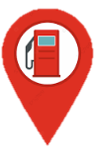
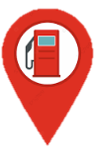
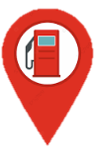
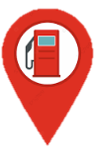
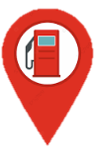
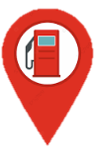
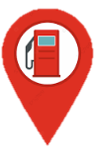
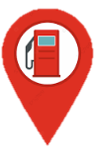
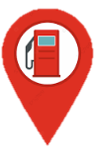
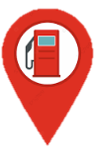
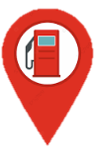
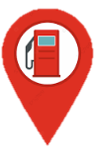
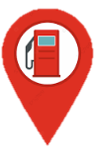
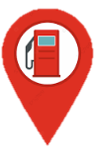
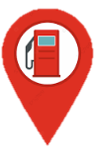
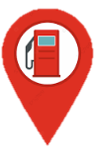
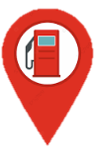
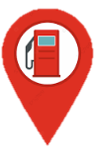
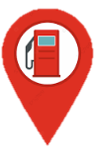
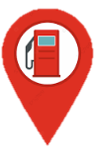
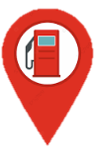
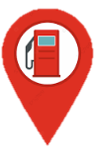
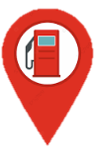
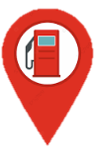
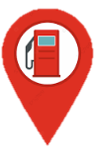
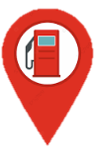
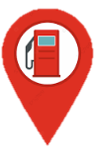
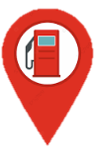
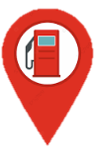
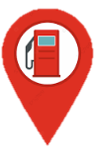
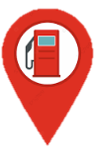
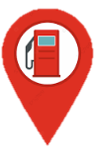
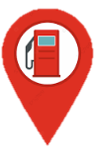
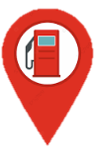
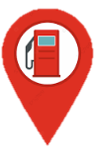
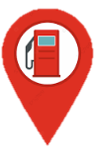
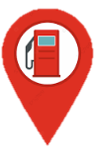
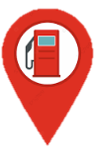
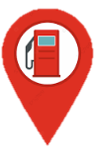
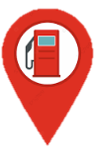
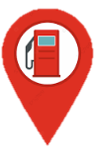
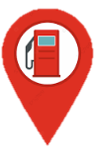
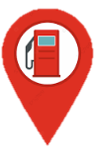
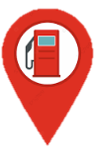
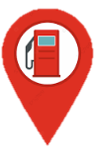
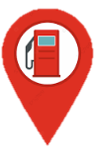
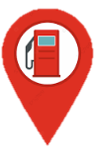
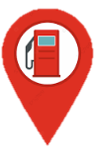
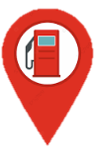
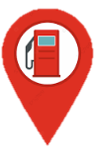
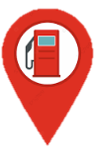
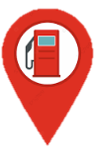
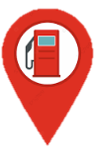
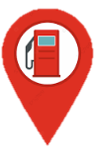
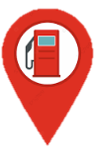
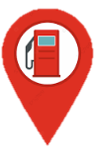
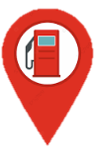
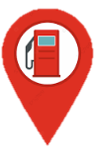
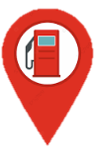
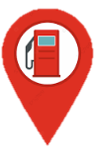
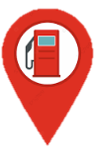
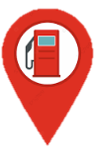
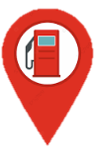
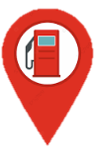
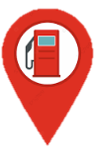
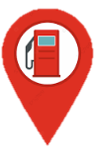
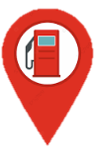
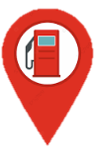
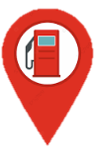
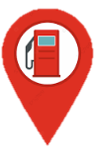

In [7]:
# 데이터프레임 생성 (예시)
data =DataFrame({
    'x-coordinate': pdf['위도'],
    'y-coordinate': pdf['경도'],
    'popup': pdf['상호'] #popup 기능 대체
})

# 새로운 지도 객체 생성
world = folium.Map(location=[36.480058,127.289039],zoom_start=15) #지도 조회시 처음 비춰지는 곳 setting

# 데이터프레임의 행 수만큼 반복하면서 마커 생성
for index, row in data.iterrows():
    # 내 컴퓨터상의 아이콘 사용 (pushpin.png 이미지를 사용)
    iconimg = folium.features.CustomIcon('C:/Users/User/Desktop/주유.PNG', icon_size=(30, 30))
    folium.Marker([row['x-coordinate'], row['y-coordinate']],
                  icon=iconimg,
                  popup=row['popup']).add_to(world)

# 지도 출력
world
